<a href="https://colab.research.google.com/github/MuhammadShavaiz/Spam_or_Ham_EmailDetection/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Algebraic operation
import numpy as np
# Data loading, Data processing, Data statistical analysis
import pandas as pd
# Funciton to split data into train and test
from sklearn.model_selection import train_test_split
# Models for prediciton
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Accuracy funciton
from sklearn.metrics import accuracy_score

## Importing Dataset
Downloading dataset from google drive if it's not already present and then laoding it into a pandas DataFrame.

In [5]:
import urllib.request
import os

# Shared link is link to my google drive containing data.
# File ID extracted from the shared Google Drive link
file_id = "1-4u8QhtqJtYoIcD_O0V1D65aiJm1ggqY"
# Create the direct download link
shared_link = f"https://drive.google.com/uc?id={file_id}"
dataset_path = "/content/dataset.csv"

if not os.path.exists(dataset_path):
    # Download the dataset if it doesn't exist
    urllib.request.urlretrieve(shared_link, dataset_path)
    print("Dataset downloaded.")
else:
    print("Dataset already exists.")

# Load the dataset
data = pd.read_csv(dataset_path)

Dataset downloaded.


## About Dataset
The CSV file contains 5,172 rows, each representing an email, with 3,002 columns: the first for anonymized email names, the last for spam labels (1 for spam, 0 for not spam), and the remaining 3,000 for word counts of the most common words. This compact format stores word frequencies across all emails in a single dataframe.

In [6]:
# Display the first few rows of the dataset
data.head(15)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing , Descriptive Statistics and Exploratory Data Analysis:
Data preprocessing cleans and prepares data by fixing missing values and normalizing features. Descriptive statistics give a quick overview of key metrics like averages and spread. Exploratory data analysis (EDA) explores data patterns and relationships to guide further analysis.

In [10]:
# Outputs the number of missing values accross each feature(column)
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


**The above output shows no missing values in dataset.**

In [9]:
"""summary helps in understanding the central tendency, dispersion, and range of word counts
 across dataset of emails"""
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [12]:
"""Computes the correlation matrix for numerical columns in a DataFrame,
 showing the pairwise correlations between them."""
correlation_matrix = data.select_dtypes(include='number').corr()
correlation_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


# Data Splitting
Splitting the data in train(70%) data and test(30%) data using sklearn train_test_split()

In [20]:
X = data.iloc[:,1:3001]
Y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [21]:
# First 10 columns of first 10 rows
print(X.iloc[:10,:10])

   the  to  ect  and  for  of    a  you  hou  in
0    0   0    1    0    0   0    2    0    0   0
1    8  13   24    6    6   2  102    1   27  18
2    0   0    1    0    0   0    8    0    0   4
3    0   5   22    0    5   1   51    2   10   1
4    7   6   17    1    5   2   57    0    9   3
5    4   5    1    4    2   3   45    1    0  16
6    5   3    1    3    2   1   37    0    0   9
7    0   2    2    3    1   2   21    6    0   2
8    2   2    3    0    0   1   18    0    0   3
9    4   4   35    0    1   0   49    1   16   9


In [22]:
# Y values of First 10 mails
print(Y[:10])

[0 0 0 0 0 1 0 1 0 0]


# Training and Testing
The following code trains and tests various classification models, evaluates their accuracy, and generates confusion matrices. This process helps assess how well each model performs and identifies areas where it may make errors.


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model_name, X_train = X_train, X_test = X_test, y_train = y_train,y_test = y_test):
    # Define available models
    models = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "SVC": SVC(),
        "RandomForestClassifier": RandomForestClassifier()
    }

    # Check if model_name is valid
    if model_name not in models:
        raise ValueError(f"Model '{model_name}' is not recognized. Choose from {list(models.keys())}.")

    # Initialize the model
    model = models[model_name]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("")

    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    return model_name, accuracy

# Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming that features are independent given the class. It's efficient and works well with large datasets, especially for text classification tasks like spam detection.

**Gaussian Naive Bayes: Assumes features follow a normal distribution and is suitable for continuous data with Gaussian-like distributions.**

GaussianNB Accuracy: 0.9594



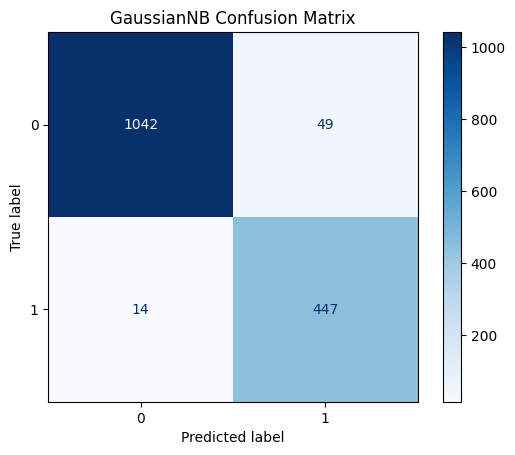

In [30]:
evaluate_model('GaussianNB')